In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Chage cwd
print(f'CWD: \n{os.getcwd()}')
os.chdir('../..')
print(f'CWD: \n{os.getcwd()}')

CWD: 
c:\Users\tyler\OneDrive\Documents\Python\MLB\backend\analysis
CWD: 
c:\Users\tyler\OneDrive\Documents\Python\MLB


In [5]:
# Load schedules
schedule = pd.DataFrame()
for season in range(2022-5, 2022):
    schedule = schedule.append(pd.read_csv(f'backend/data/schedules/{season}.csv'), ignore_index=True)

schedule['date'] = pd.to_datetime(schedule['date'])
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10815 entries, 0 to 10814
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     10815 non-null  datetime64[ns]
 1   visitor  10815 non-null  object        
 2   home     10815 non-null  object        
 3   season   10815 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 338.1+ KB


In [6]:
# Load scores
scores = pd.read_csv('backend/data/scores/boxscore.csv')
scores['date'] = pd.to_datetime(scores['date'])

scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21630 entries, 0 to 21629
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     21630 non-null  datetime64[ns]
 1   visitor  21630 non-null  object        
 2   home     21630 non-null  object        
 3   team     21630 non-null  object        
 4   1        21630 non-null  int64         
 5   2        21630 non-null  int64         
 6   3        21630 non-null  int64         
 7   4        21630 non-null  int64         
 8   5        21630 non-null  object        
 9   6        21622 non-null  object        
 10  7        21608 non-null  object        
 11  8        21184 non-null  object        
 12  9        21130 non-null  object        
 13  R        21630 non-null  int64         
 14  H        21630 non-null  int64         
 15  E        21630 non-null  int64         
 16  10       1804 non-null   float64       
 17  11       838 non-null    float6

In [7]:
# Load batting totals
batting_totals = pd.read_csv('backend/data/batting/totals.csv').drop(['details'], axis=1)
batting_totals['date'] = pd.to_datetime(batting_totals['date'])
batting_totals['wpa-'] = batting_totals['wpa-'].apply(lambda x: float(x.strip("%")))
batting_totals['cwpa'] = batting_totals['cwpa'].apply(lambda x: float(x.strip("%")))

batting_totals.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21630 entries, 0 to 21629
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     21630 non-null  datetime64[ns]
 1   visitor  21630 non-null  object        
 2   home     21630 non-null  object        
 3   team     21630 non-null  object        
 4   ab       21630 non-null  int64         
 5   r        21630 non-null  int64         
 6   h        21630 non-null  int64         
 7   rbi      21630 non-null  int64         
 8   bb       21630 non-null  int64         
 9   so       21630 non-null  int64         
 10  pa       21630 non-null  int64         
 11  ba       21630 non-null  float64       
 12  obp      21630 non-null  float64       
 13  slg      21630 non-null  float64       
 14  ops      21630 non-null  float64       
 15  pit      21630 non-null  int64         
 16  str      21630 non-null  int64         
 17  wpa      21630 non-null  float6

In [8]:
# Load pitching totals
pitching_totals = pd.read_csv('backend/data/pitching/totals.csv')
pitching_totals['date'] = pd.to_datetime(pitching_totals['date'])

pitching_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21630 entries, 0 to 21629
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     21630 non-null  datetime64[ns]
 1   visitor  21630 non-null  object        
 2   home     21630 non-null  object        
 3   team     21630 non-null  object        
 4   ip       21630 non-null  float64       
 5   h        21630 non-null  int64         
 6   r        21630 non-null  int64         
 7   er       21630 non-null  int64         
 8   bb       21630 non-null  int64         
 9   so       21630 non-null  int64         
 10  hr       21630 non-null  int64         
 11  era      21630 non-null  float64       
 12  bf       21630 non-null  int64         
 13  pit      21630 non-null  int64         
 14  str      21630 non-null  int64         
 15  ctct     21630 non-null  int64         
 16  sts      21630 non-null  int64         
 17  stl      21630 non-null  int64 

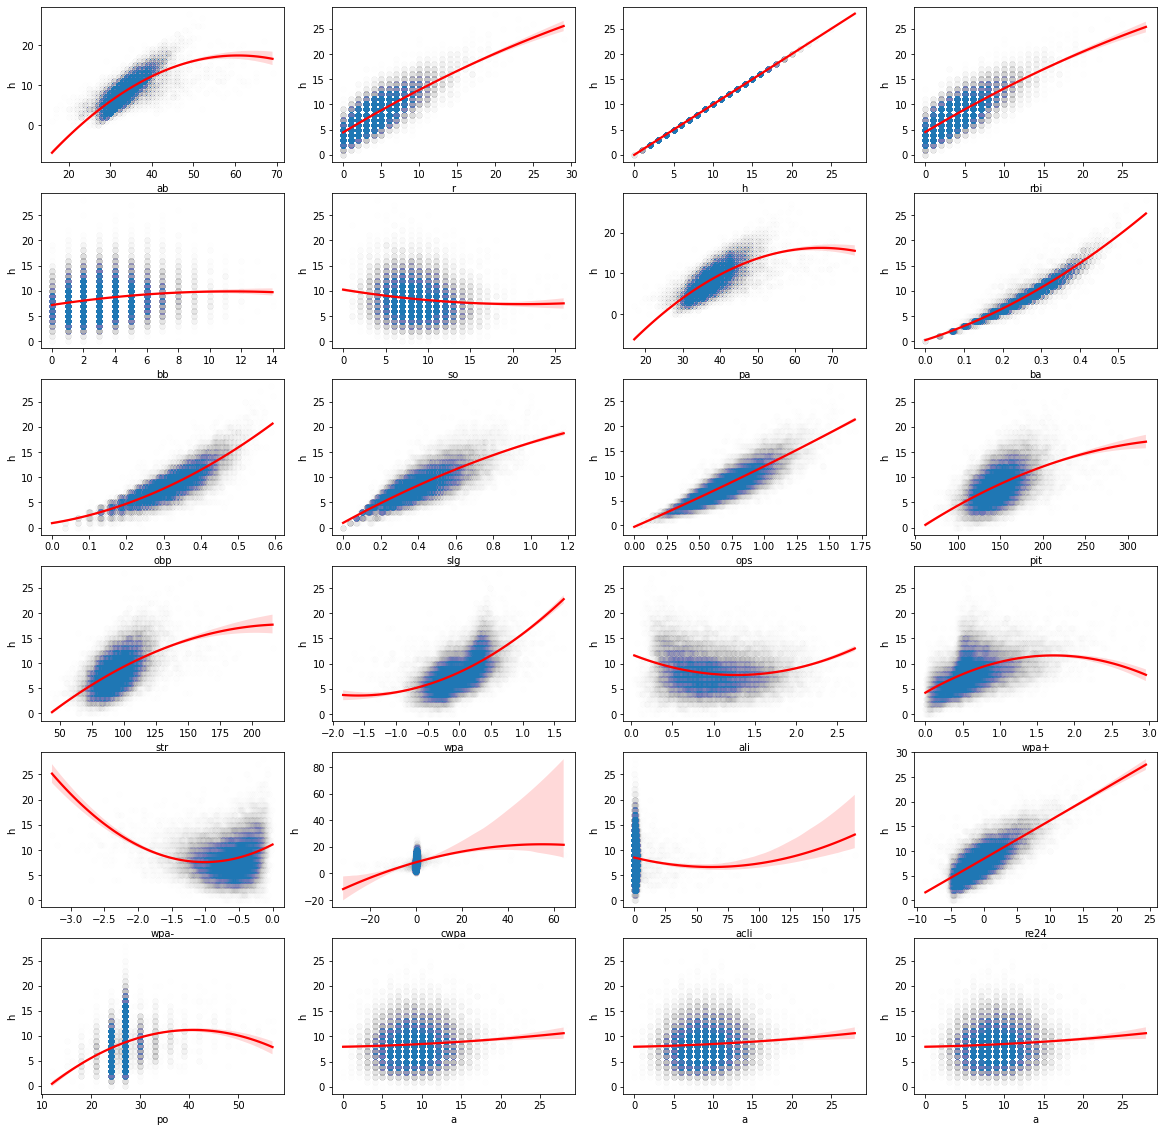

In [9]:
# Graph batting statistics against hits to see in game correlations
fig, ax = plt.subplots(6, 4, figsize=(20, 20))

for i in range(6):
    for j in range(4):
        if i < 5 or j < 2: 
            stat = batting_totals.columns[i*4 + j + 4]
        sns.regplot(
            data=batting_totals, 
            x=stat,
            y="h", 
            order=2,
            ax=ax[i, j], 
            scatter_kws={'alpha':0.005}, 
            line_kws={"color": "red"}
            )

In [ ]:
# Function for feature engineering stats
def feature_engineer(df):
   df['ba'] = df['h']/df['ab']
   df['obp'] = (df['h'] + df['bb'] + df[''])

In [80]:
# Function for sma
def sma(bin, df):
    temp_df = df.sort_values(by=['team', 'date']).copy()

    sma_df = pd.DataFrame()
    
    for team in df['team'].unique():
        team_df = temp_df[temp_df['team'] == team].copy()
        for col in df.columns[4:]:
            team_df[col] = team_df[col].rolling(bin, min_periods=1).mean()
        
        sma_df = sma_df.append(team_df, ignore_index=True)
    
    sma_df = pd.merge(
        sma_df, 
        batting_totals[['date', 'visitor', 'home', 'team', 'h']],
        left_on=['date', 'visitor', 'home', 'team'], 
        right_on=['date', 'visitor', 'home', 'team'],
        suffixes=('', '_target')
    )

    return sma_df.sort_values(by=['date'])

In [81]:
# Function for season sma
def season_sma(df):
    temp_df = df.sort_values(by=['team', 'date']).copy()

    sma_df = pd.DataFrame()

    for team in df['team'].unique():
        for season in df['date'].dt.year.unique():
            team_df = temp_df[(temp_df['team'] == team) & (temp_df['date'].dt.year == season)].copy()
            for col in df.columns[4:]:
                team_df[col] = team_df[col].expanding(1).mean()
            
            sma_df = sma_df.append(team_df, ignore_index=True)
    
    sma_df = pd.merge(
        sma_df, 
        batting_totals[['date', 'visitor', 'home', 'team', 'h']],
        left_on=['date', 'visitor', 'home', 'team'], 
        right_on=['date', 'visitor', 'home', 'team'],
        suffixes=('', '_target')
    )

    return sma_df.sort_values(by=['date'])

In [83]:
# Apply SMA (season, last 20 games, last 10 games, last 5 games, last 3 games, last game)
cols = ['date', 'visitor', 'home', 'team', 'ab', 'r', 'h', 'rbi', 'bb', 'so', 'pa', 'pit', 'str', 'po', 'a']
df = batting_totals[cols]
sma_season = season_sma(df)
sma_20, sma_10, sma_5, sma_3, sma_1 = sma(20, df), sma(10, df), sma(5, df), sma(3, df), sma(1, df)

SEASON


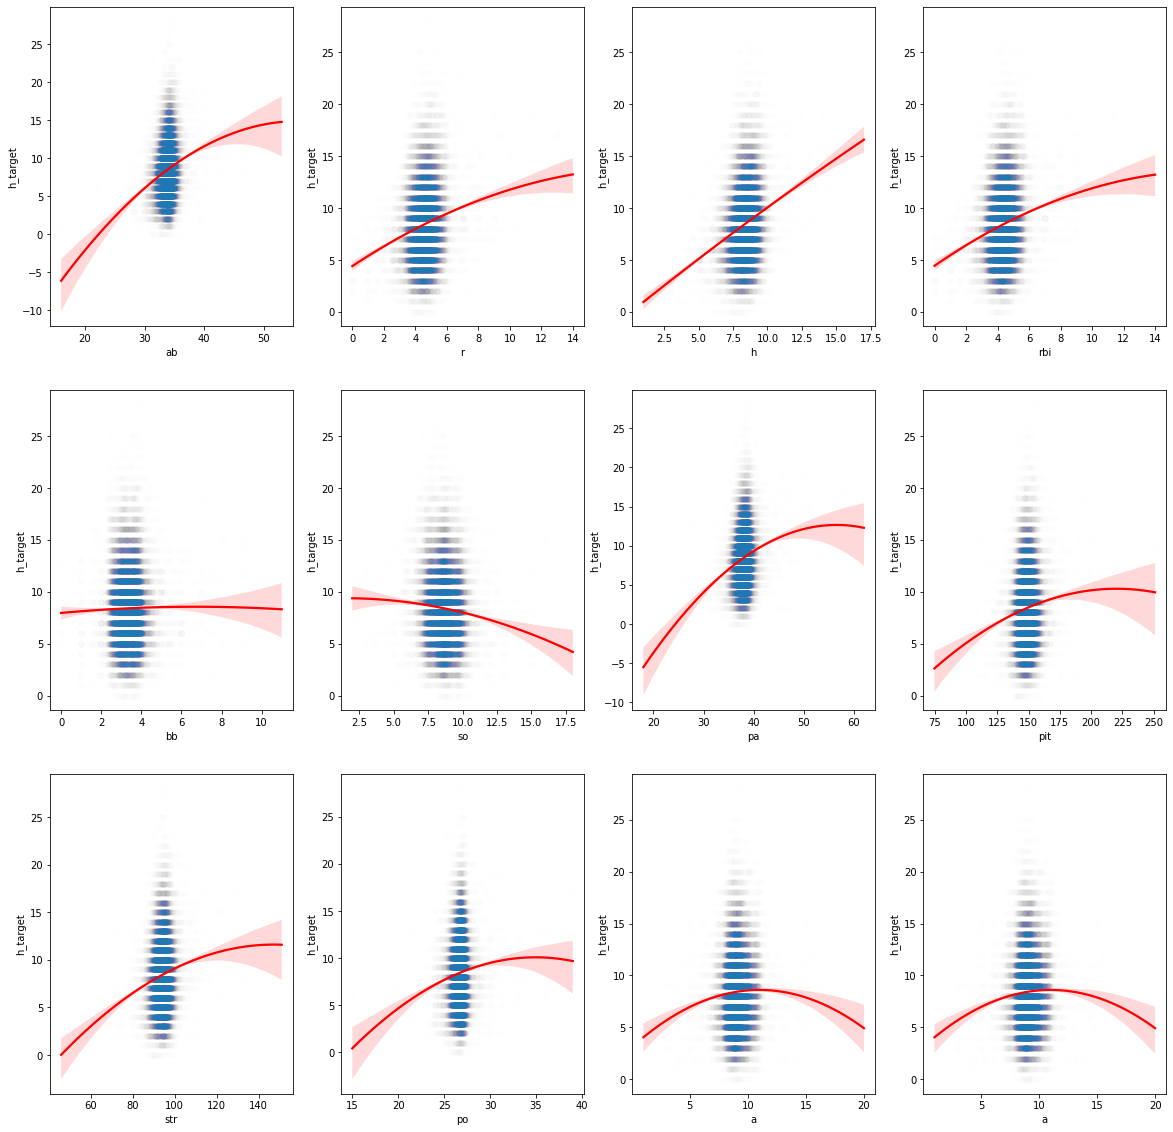

20 GAME


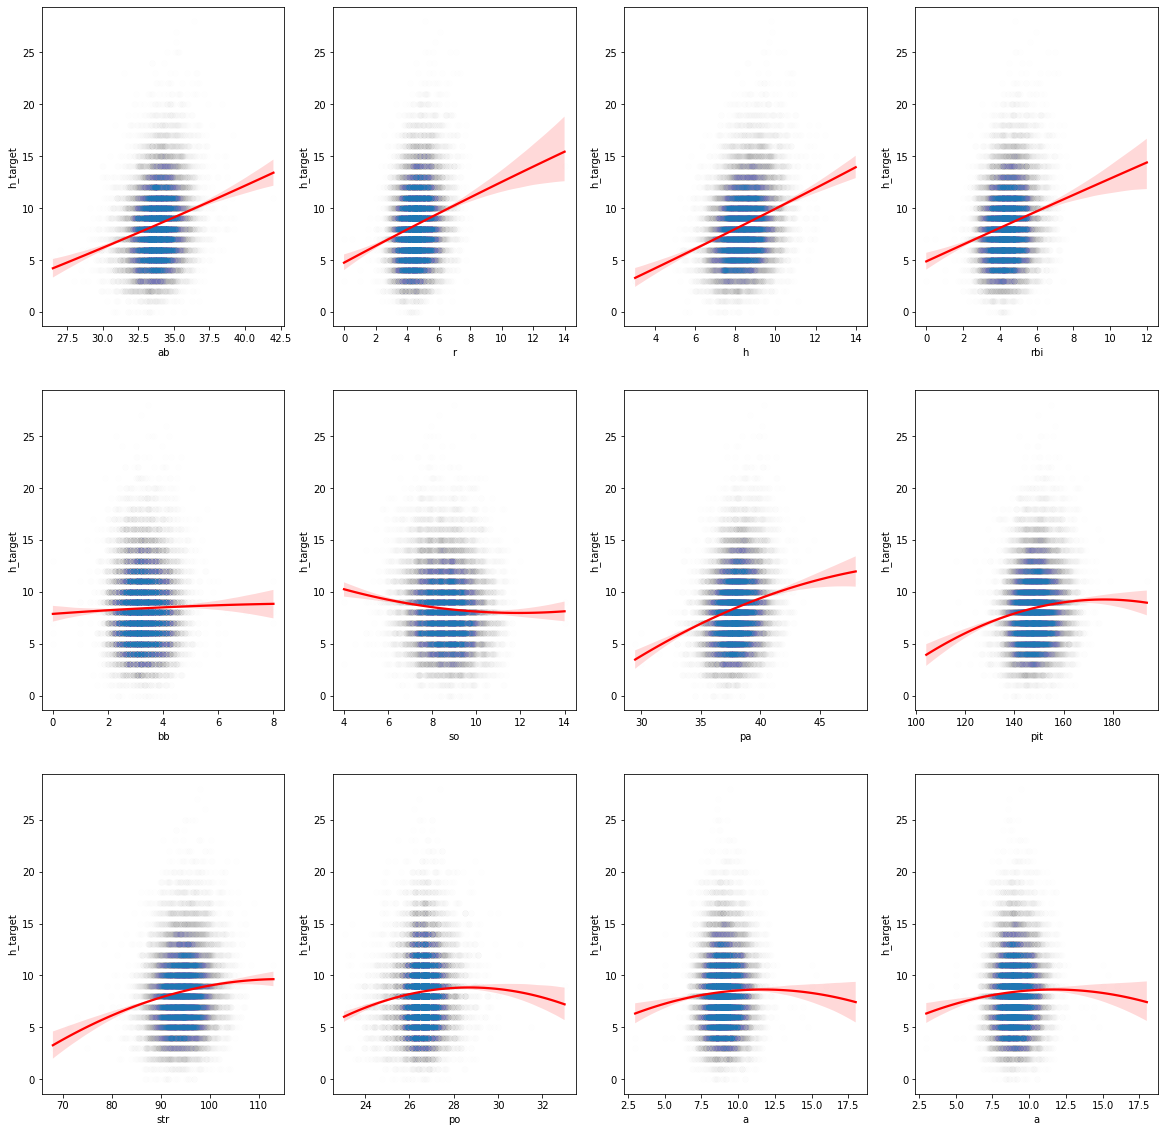

10 GAME


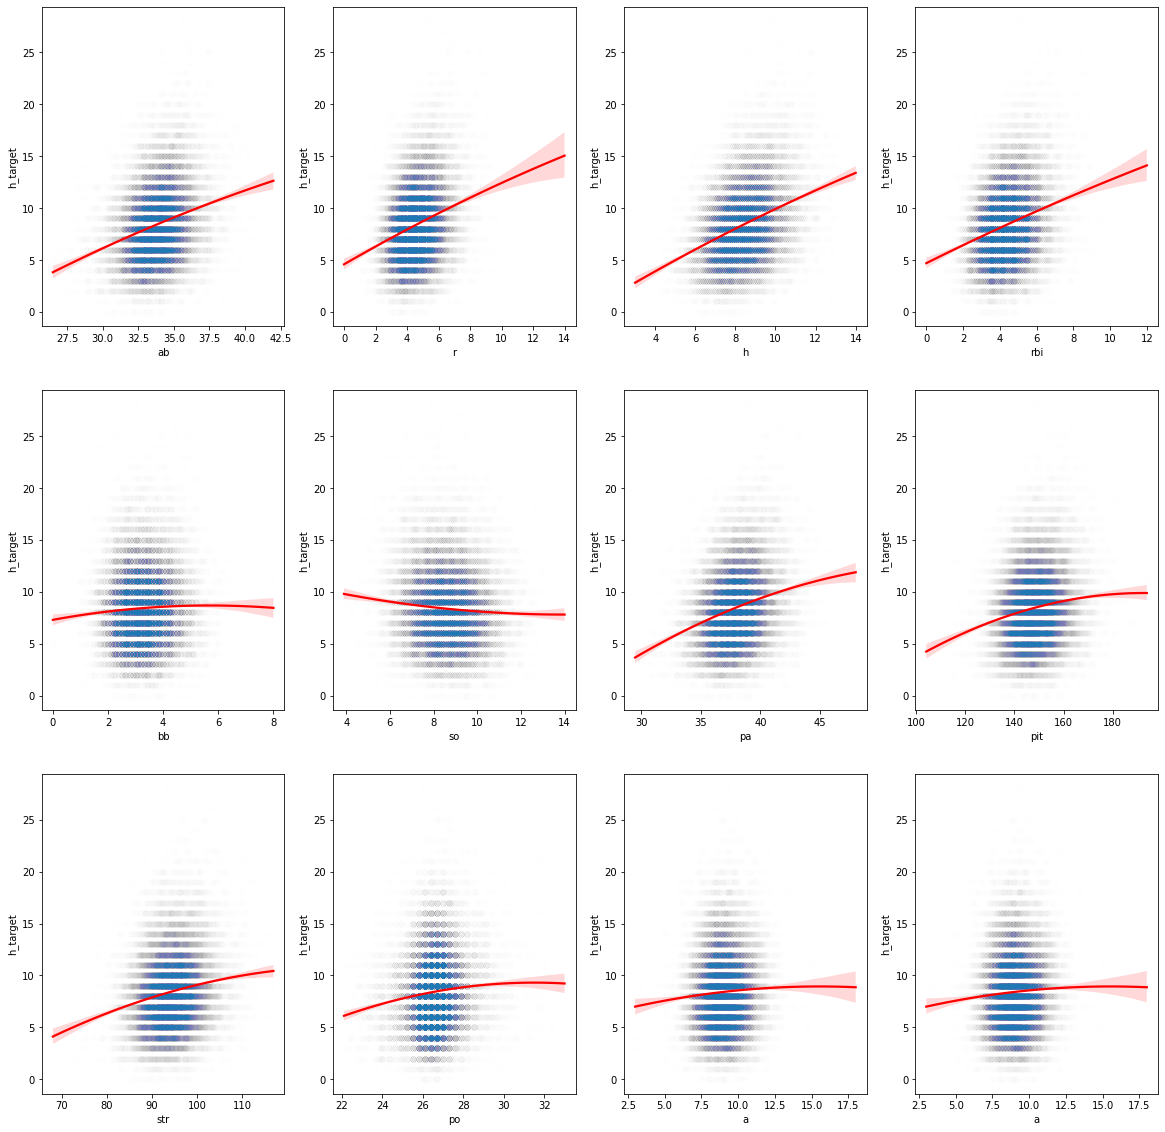

5 GAME


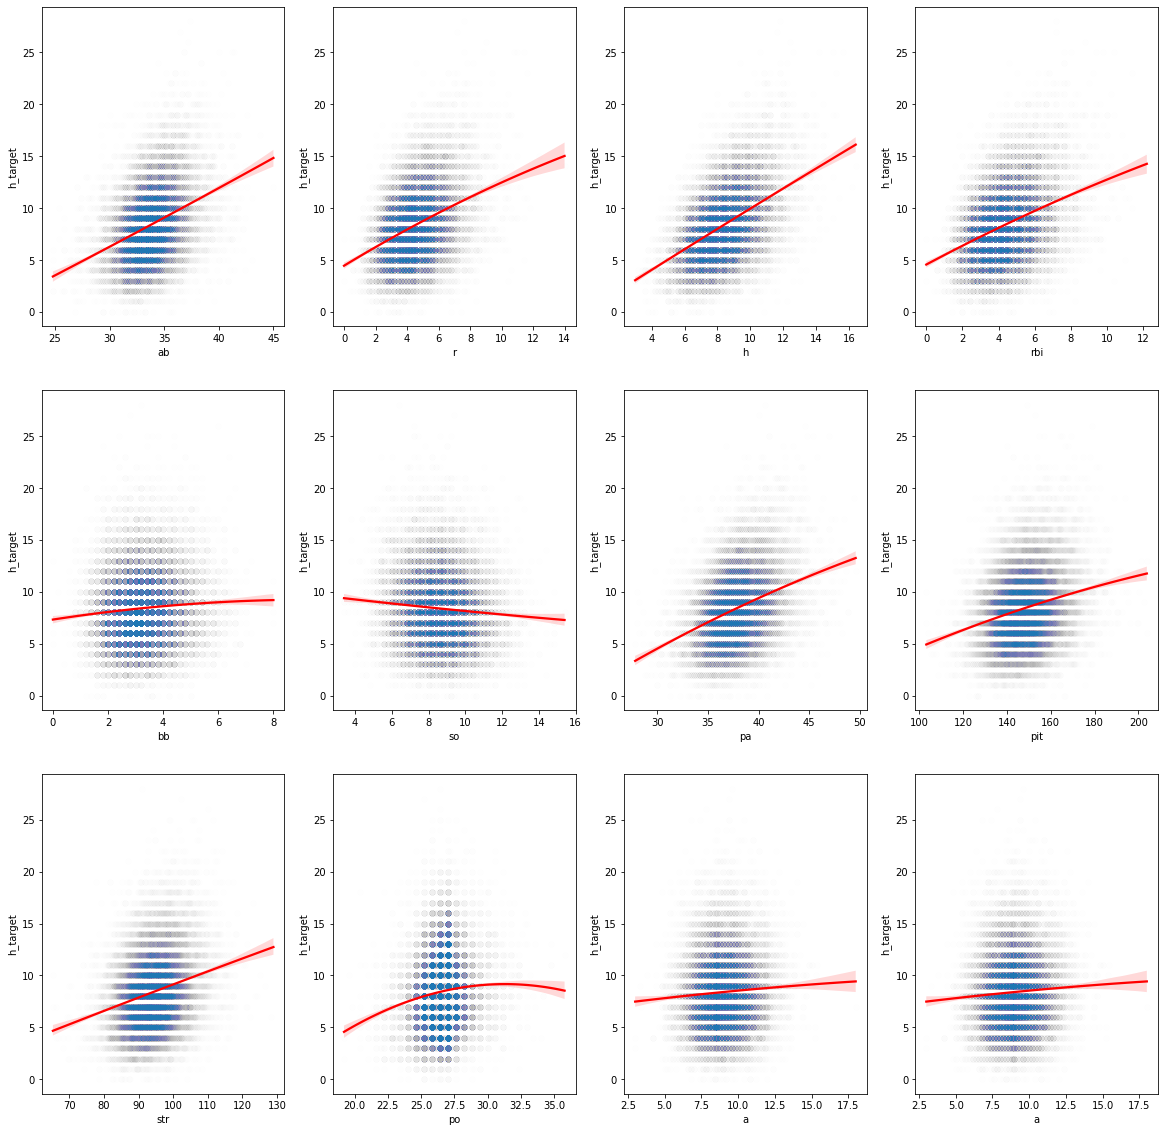

3 GAME


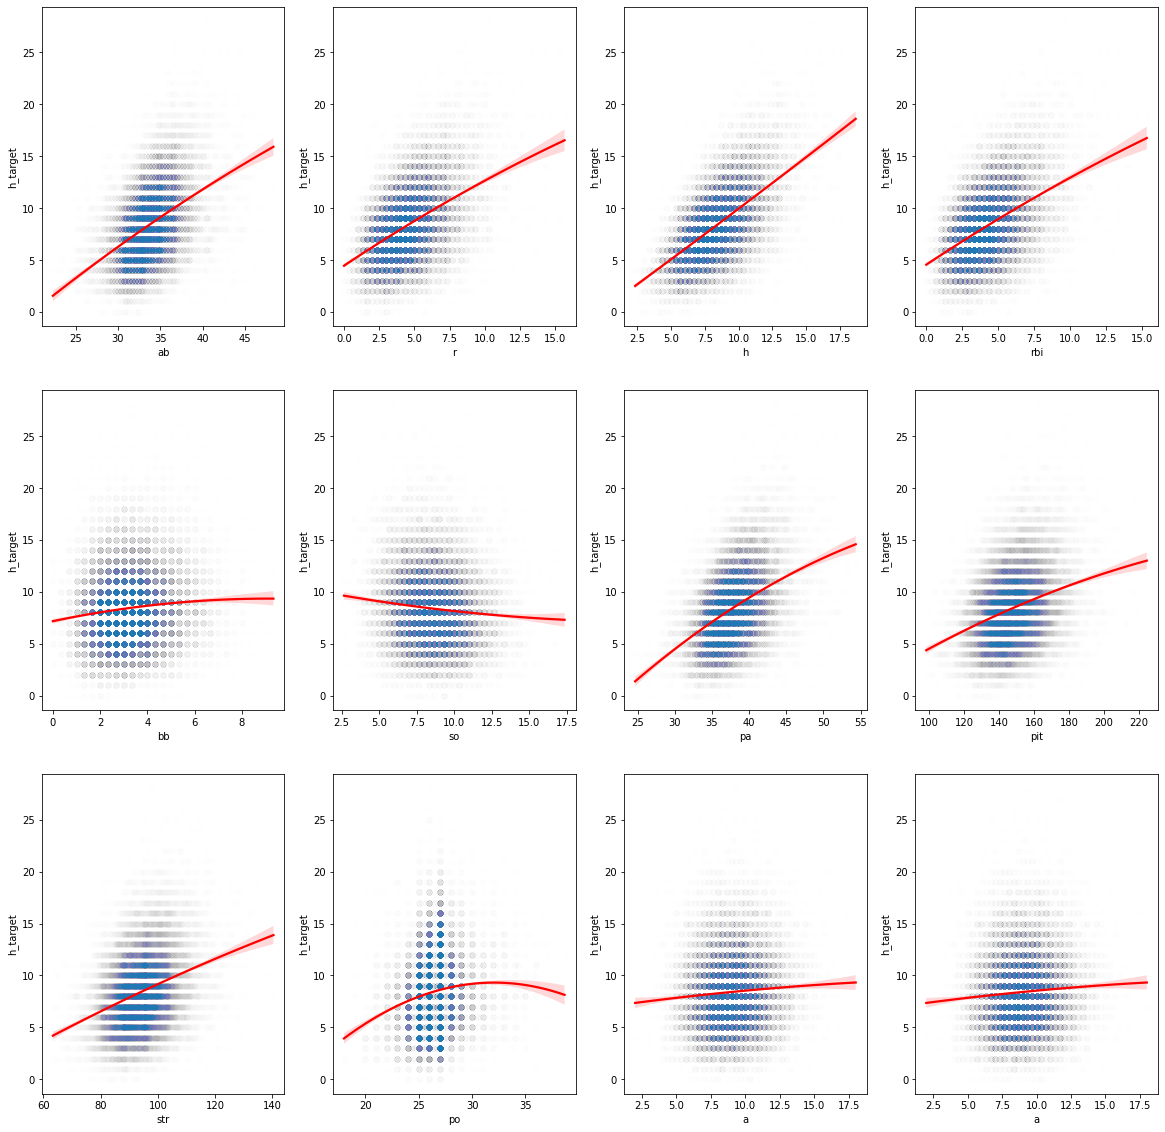

1 GAME


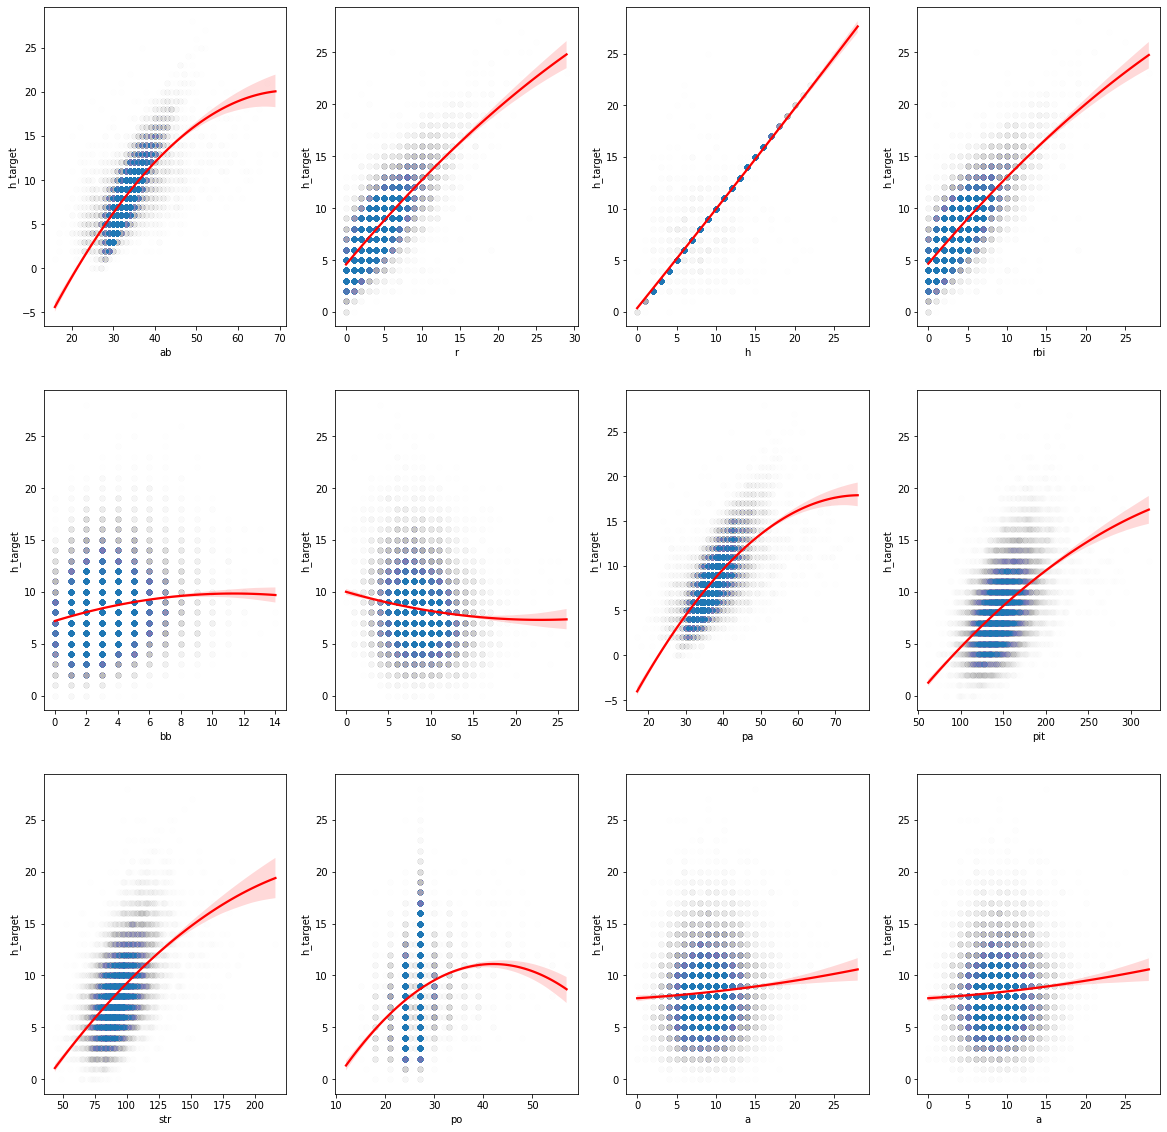

In [89]:
dfs = {'season': sma_season, '20 game': sma_20, '10 game': sma_10, '5 game': sma_5, '3 game': sma_3, '1 game': sma_1}
for df in dfs:
    print(f'{df.upper()}')
    # Graph
    fig, ax = plt.subplots(3, 4, figsize=(20, 20))

    for i in range(3):
        for j in range(4):
            if i*4 + j < len(cols) - 4: 
                stat = cols[i*4 + j + 4]
            sns.regplot(
                data=dfs[df], 
                x=stat,
                y='h_target',
                order=2,
                ax=ax[i, j], 
                scatter_kws={'alpha':0.005}, 
                line_kws={"color": "red"}
                )
    
    plt.show()